In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def get_latest_csv_file(station_id='001HI'):
    current_dir = os.getcwd()
    parent_dir = os.path.dirname(current_dir)
    raw_data_dir = os.path.join(parent_dir, "Raw Station Datasets")
    csv_files = [f for f in os.listdir(raw_data_dir) if f.startswith(station_id) and f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found for station {station_id}")
    return os.path.join(raw_data_dir, max(csv_files))

def load_station_data(file_path):
    # Extract metadata
    with open(file_path, 'r') as f:
        meta_lines = [f.readline().strip() for _ in range(12)]

    # Combine the Parameter + its Units (lines 11 and 12)
    headers = meta_lines[10].split(',')
    units = meta_lines[11].split(',')

    new_headers = []
    for header, unit in zip(headers, units):
        if unit.strip():
            new_headers.append(f'{header.strip()}({unit.strip()})')
        else:
            new_headers.append(header.strip())

    # Load data
    df = pd.read_csv(file_path, skiprows=12, names=new_headers)
    
    # Identify the date/time column
    date_col = df.columns[1]  # Assuming the second column is the date/time column
    df[date_col] = pd.to_datetime(df[date_col], format='%Y-%m-%d %H:%M:%S')
    
    return df, date_col

def get_24_hour_data(df, date_col):
    latest_date = df[date_col].max()
    start_date = latest_date.replace(hour=0, minute=0, second=0) - timedelta(days=1)
    end_date = start_date + timedelta(days=1)
    return df[(df[date_col] >= start_date) & (df[date_col] < end_date)]

def plot_variables(df, date_col, station_id):
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'Station_ID']

    n_cols = 3
    n_rows = (len(numeric_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig.suptitle(f'24-hour Data for Station {station_id}', fontsize=16)

    for i, col in enumerate(numeric_cols):
        ax = axes[i // n_cols, i % n_cols]
        ax.plot(df[date_col], df[col])
        ax.set_title(col)
        ax.set_xlabel('Time')
        ax.set_ylabel(col.split('(')[0])
        ax.tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for i in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes[i // n_cols, i % n_cols])

    plt.tight_layout()
    plt.savefig(f'{station_id}_24hour_data.png', dpi=300, bbox_inches='tight')
    print(f"Plot saved as {station_id}_24hour_data.png")

def main():
    station_id = '001HI'
    try:
        file_path = get_latest_csv_file(station_id)
        df, date_col = load_station_data(file_path)
        df_24h = get_24_hour_data(df, date_col)
        plot_variables(df_24h, date_col, station_id)
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()

An error occurred: time data "2022-04-25T00:00:00Z" doesn't match format "%Y-%m-%d %H:%M:%S", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.


Plot saved as 001HI_24hour_data.png


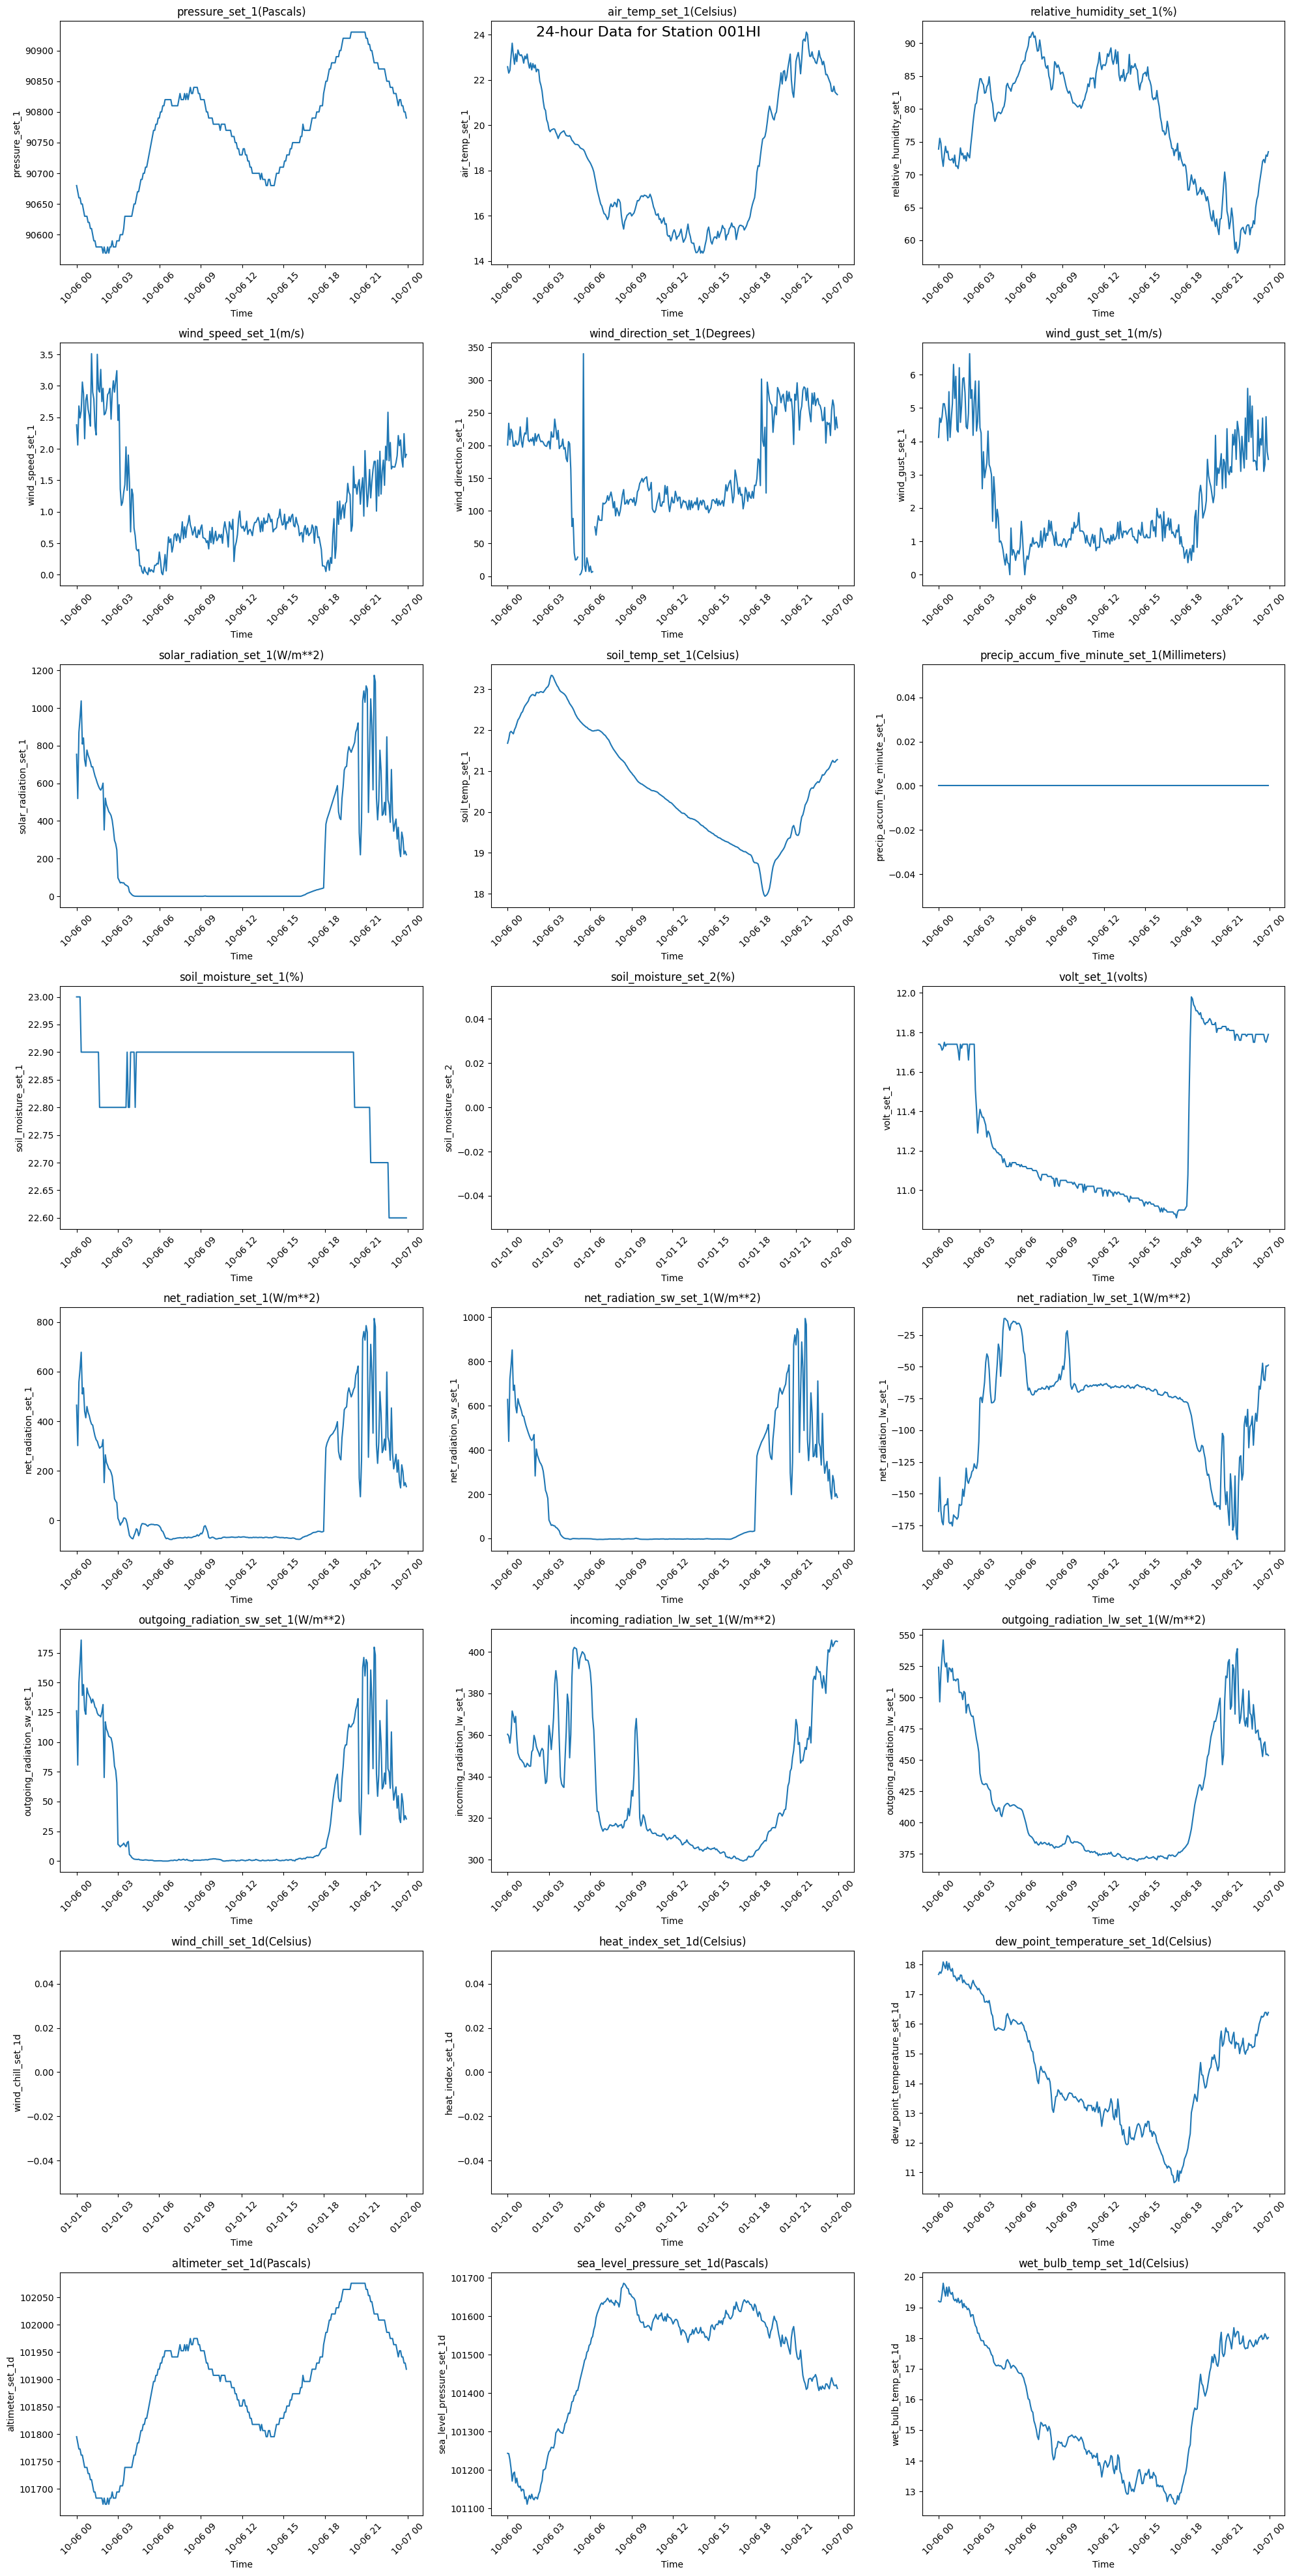

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def get_latest_csv_file(station_id='001HI'):
    current_dir = os.getcwd()
    parent_dir = os.path.dirname(current_dir)
    raw_data_dir = os.path.join(parent_dir, "Raw Station Datasets")
    csv_files = [f for f in os.listdir(raw_data_dir) if f.startswith(station_id) and f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found for station {station_id}")
    return os.path.join(raw_data_dir, max(csv_files))

def load_station_data(file_path):
    # Extract metadata
    with open(file_path, 'r') as f:
        meta_lines = [f.readline().strip() for _ in range(12)]

    # Combine the Parameter + its Units (lines 11 and 12)
    headers = meta_lines[10].split(',')
    units = meta_lines[11].split(',')

    new_headers = []
    for header, unit in zip(headers, units):
        if unit.strip():
            new_headers.append(f'{header.strip()}({unit.strip()})')
        else:
            new_headers.append(header.strip())

    # Load data
    df = pd.read_csv(file_path, skiprows=12, names=new_headers)
    
    # Identify the date/time column
    date_col = df.columns[1]  # Assuming the second column is the date/time column
    df[date_col] = pd.to_datetime(df[date_col], format='ISO8601')
    
    return df, date_col

def get_24_hour_data(df, date_col):
    latest_date = df[date_col].max()
    start_date = latest_date.replace(hour=0, minute=0, second=0, microsecond=0) - timedelta(days=1)
    end_date = start_date + timedelta(days=1)
    return df[(df[date_col] >= start_date) & (df[date_col] < end_date)]

def plot_variables(df, date_col, station_id):
    # Exclude non-numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'Station_ID']

    n_cols = 3
    n_rows = (len(numeric_cols) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    fig.suptitle(f'24-hour Data for Station {station_id}', fontsize=16)

    for i, col in enumerate(numeric_cols):
        ax = axes[i // n_cols, i % n_cols]
        ax.plot(df[date_col], df[col])
        ax.set_title(col)
        ax.set_xlabel('Time')
        ax.set_ylabel(col.split('(')[0])
        ax.tick_params(axis='x', rotation=45)

    # Remove any unused subplots
    for i in range(len(numeric_cols), n_rows * n_cols):
        fig.delaxes(axes[i // n_cols, i % n_cols])

    plt.tight_layout()
    plt.savefig(f'{station_id}_24hour_data.png', dpi=300, bbox_inches='tight')
    print(f"Plot saved as {station_id}_24hour_data.png")

def main():
    station_id = '001HI'
    try:
        file_path = get_latest_csv_file(station_id)
        df, date_col = load_station_data(file_path)
        df_24h = get_24_hour_data(df, date_col)
        plot_variables(df_24h, date_col, station_id)
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Plot saved as 001HI_24hour_data_part1.png
Plot saved as 001HI_24hour_data_part2.png


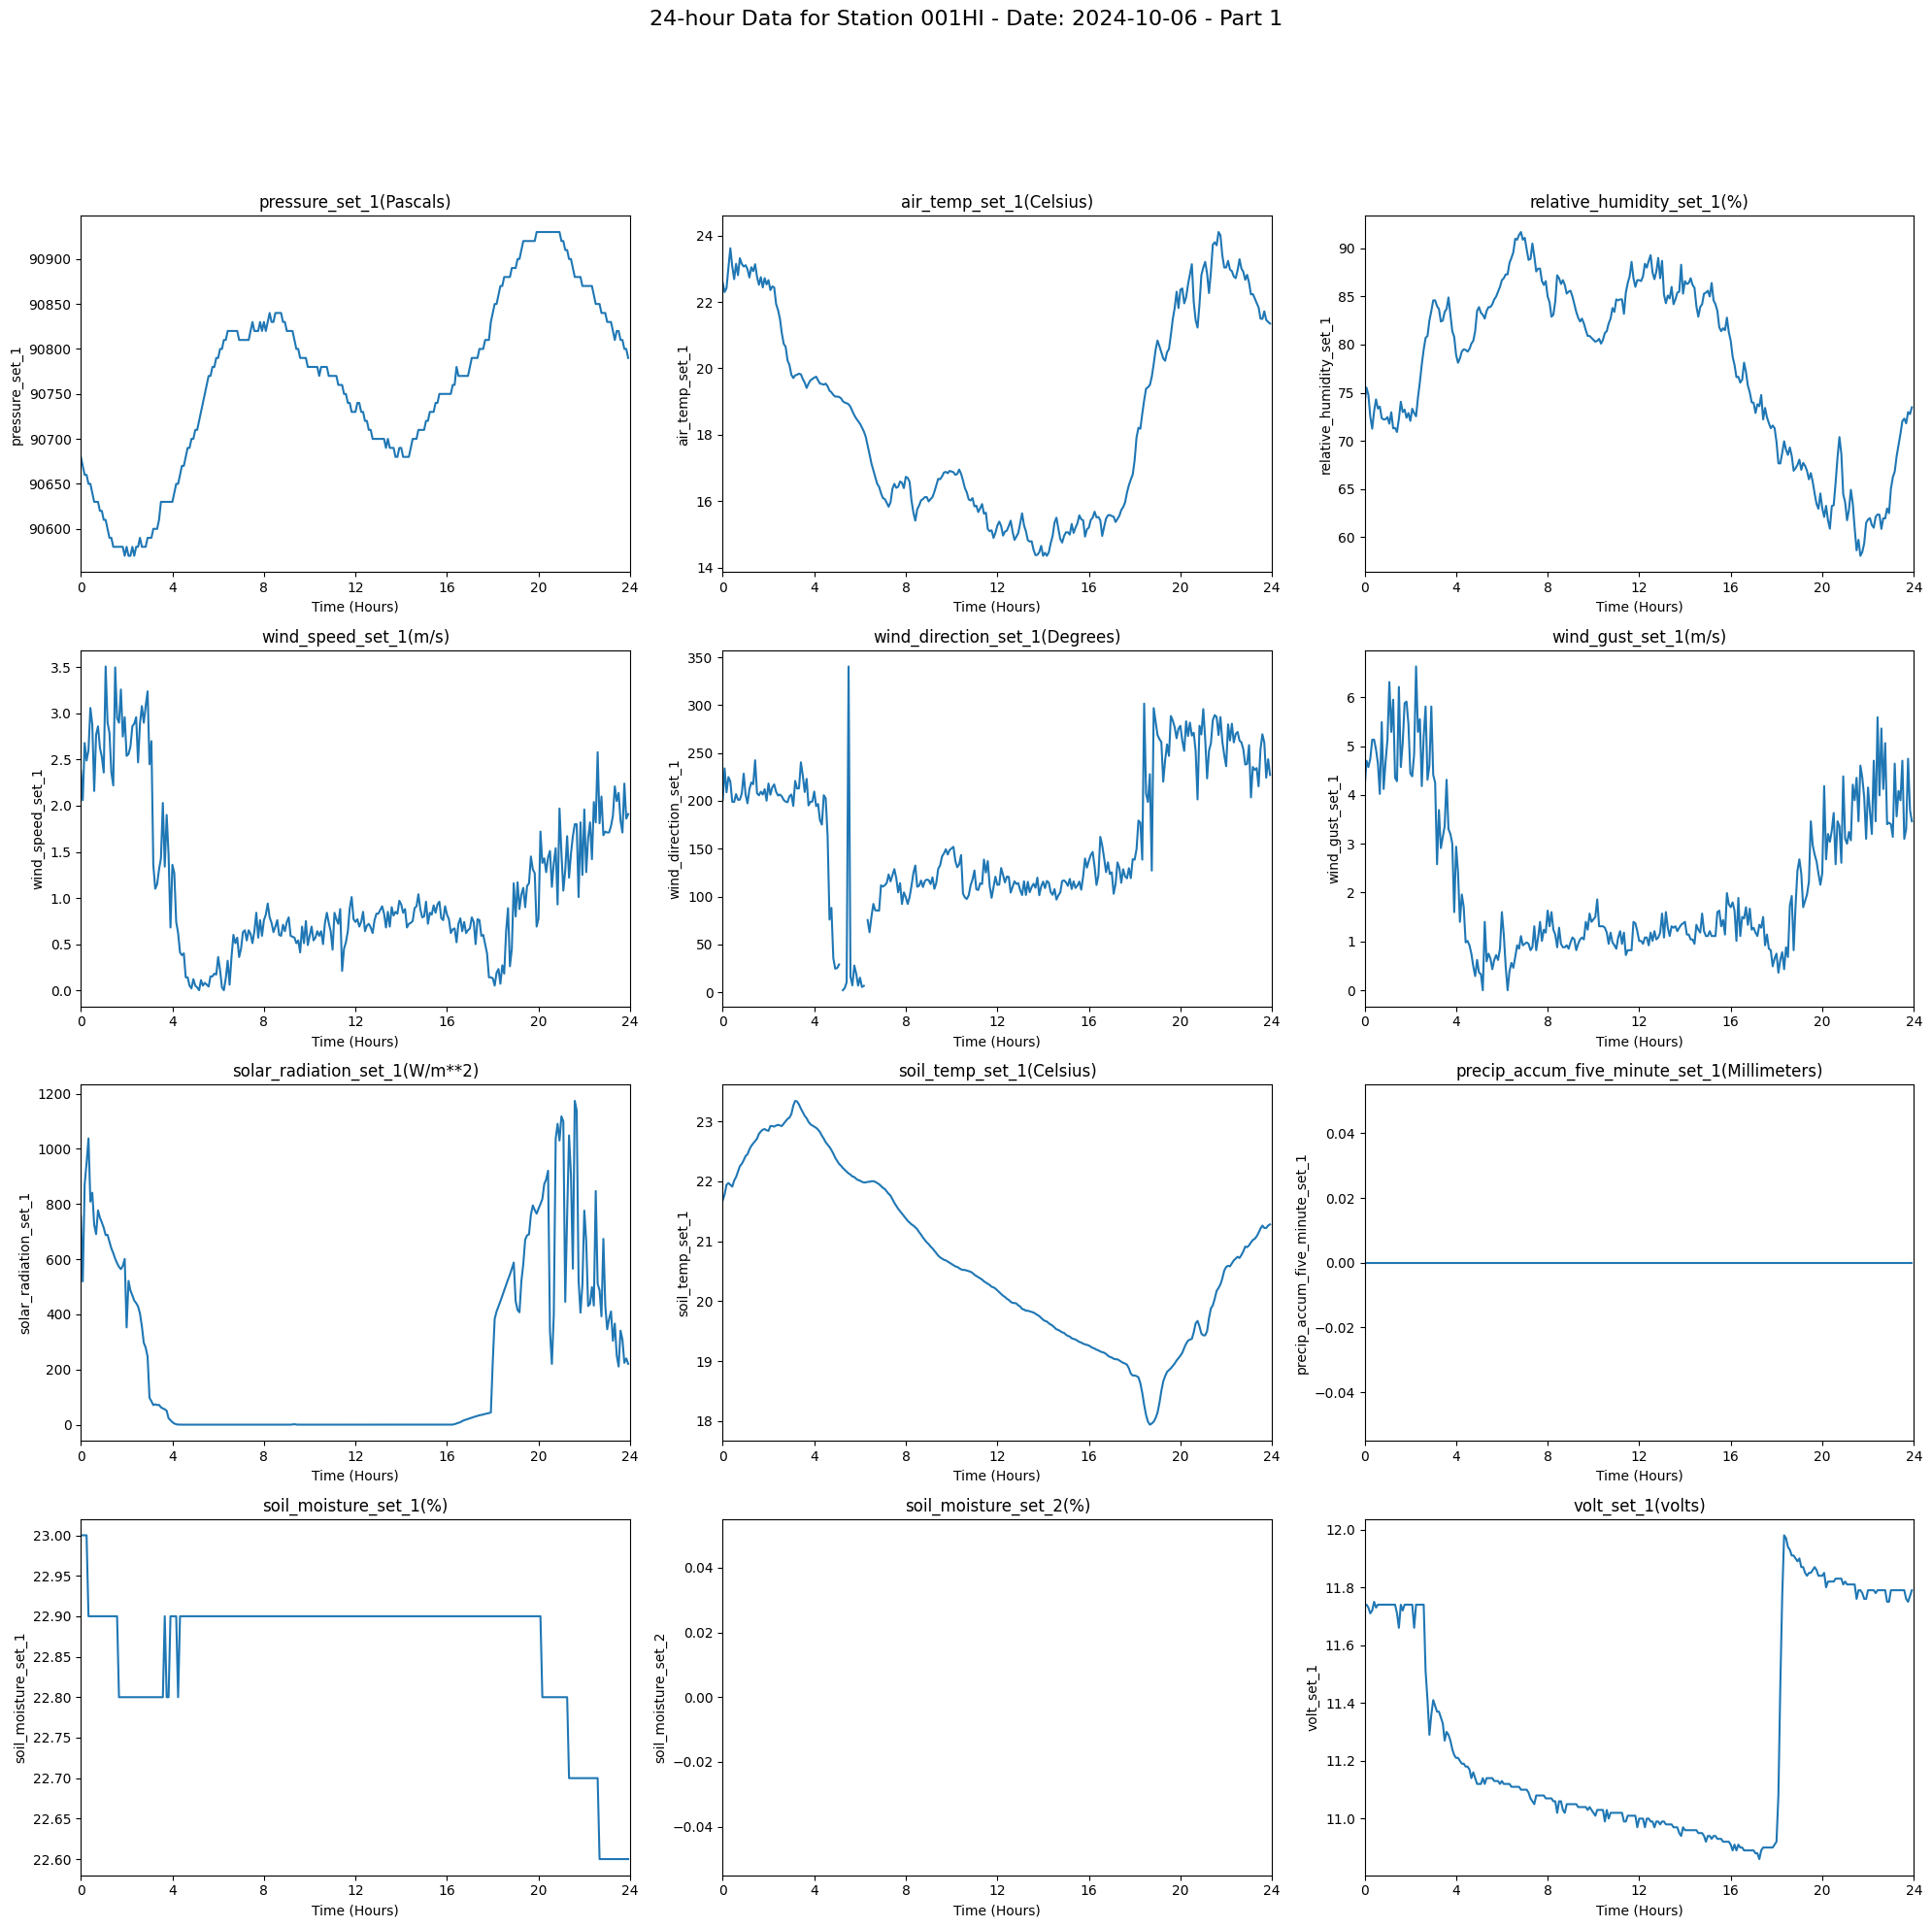

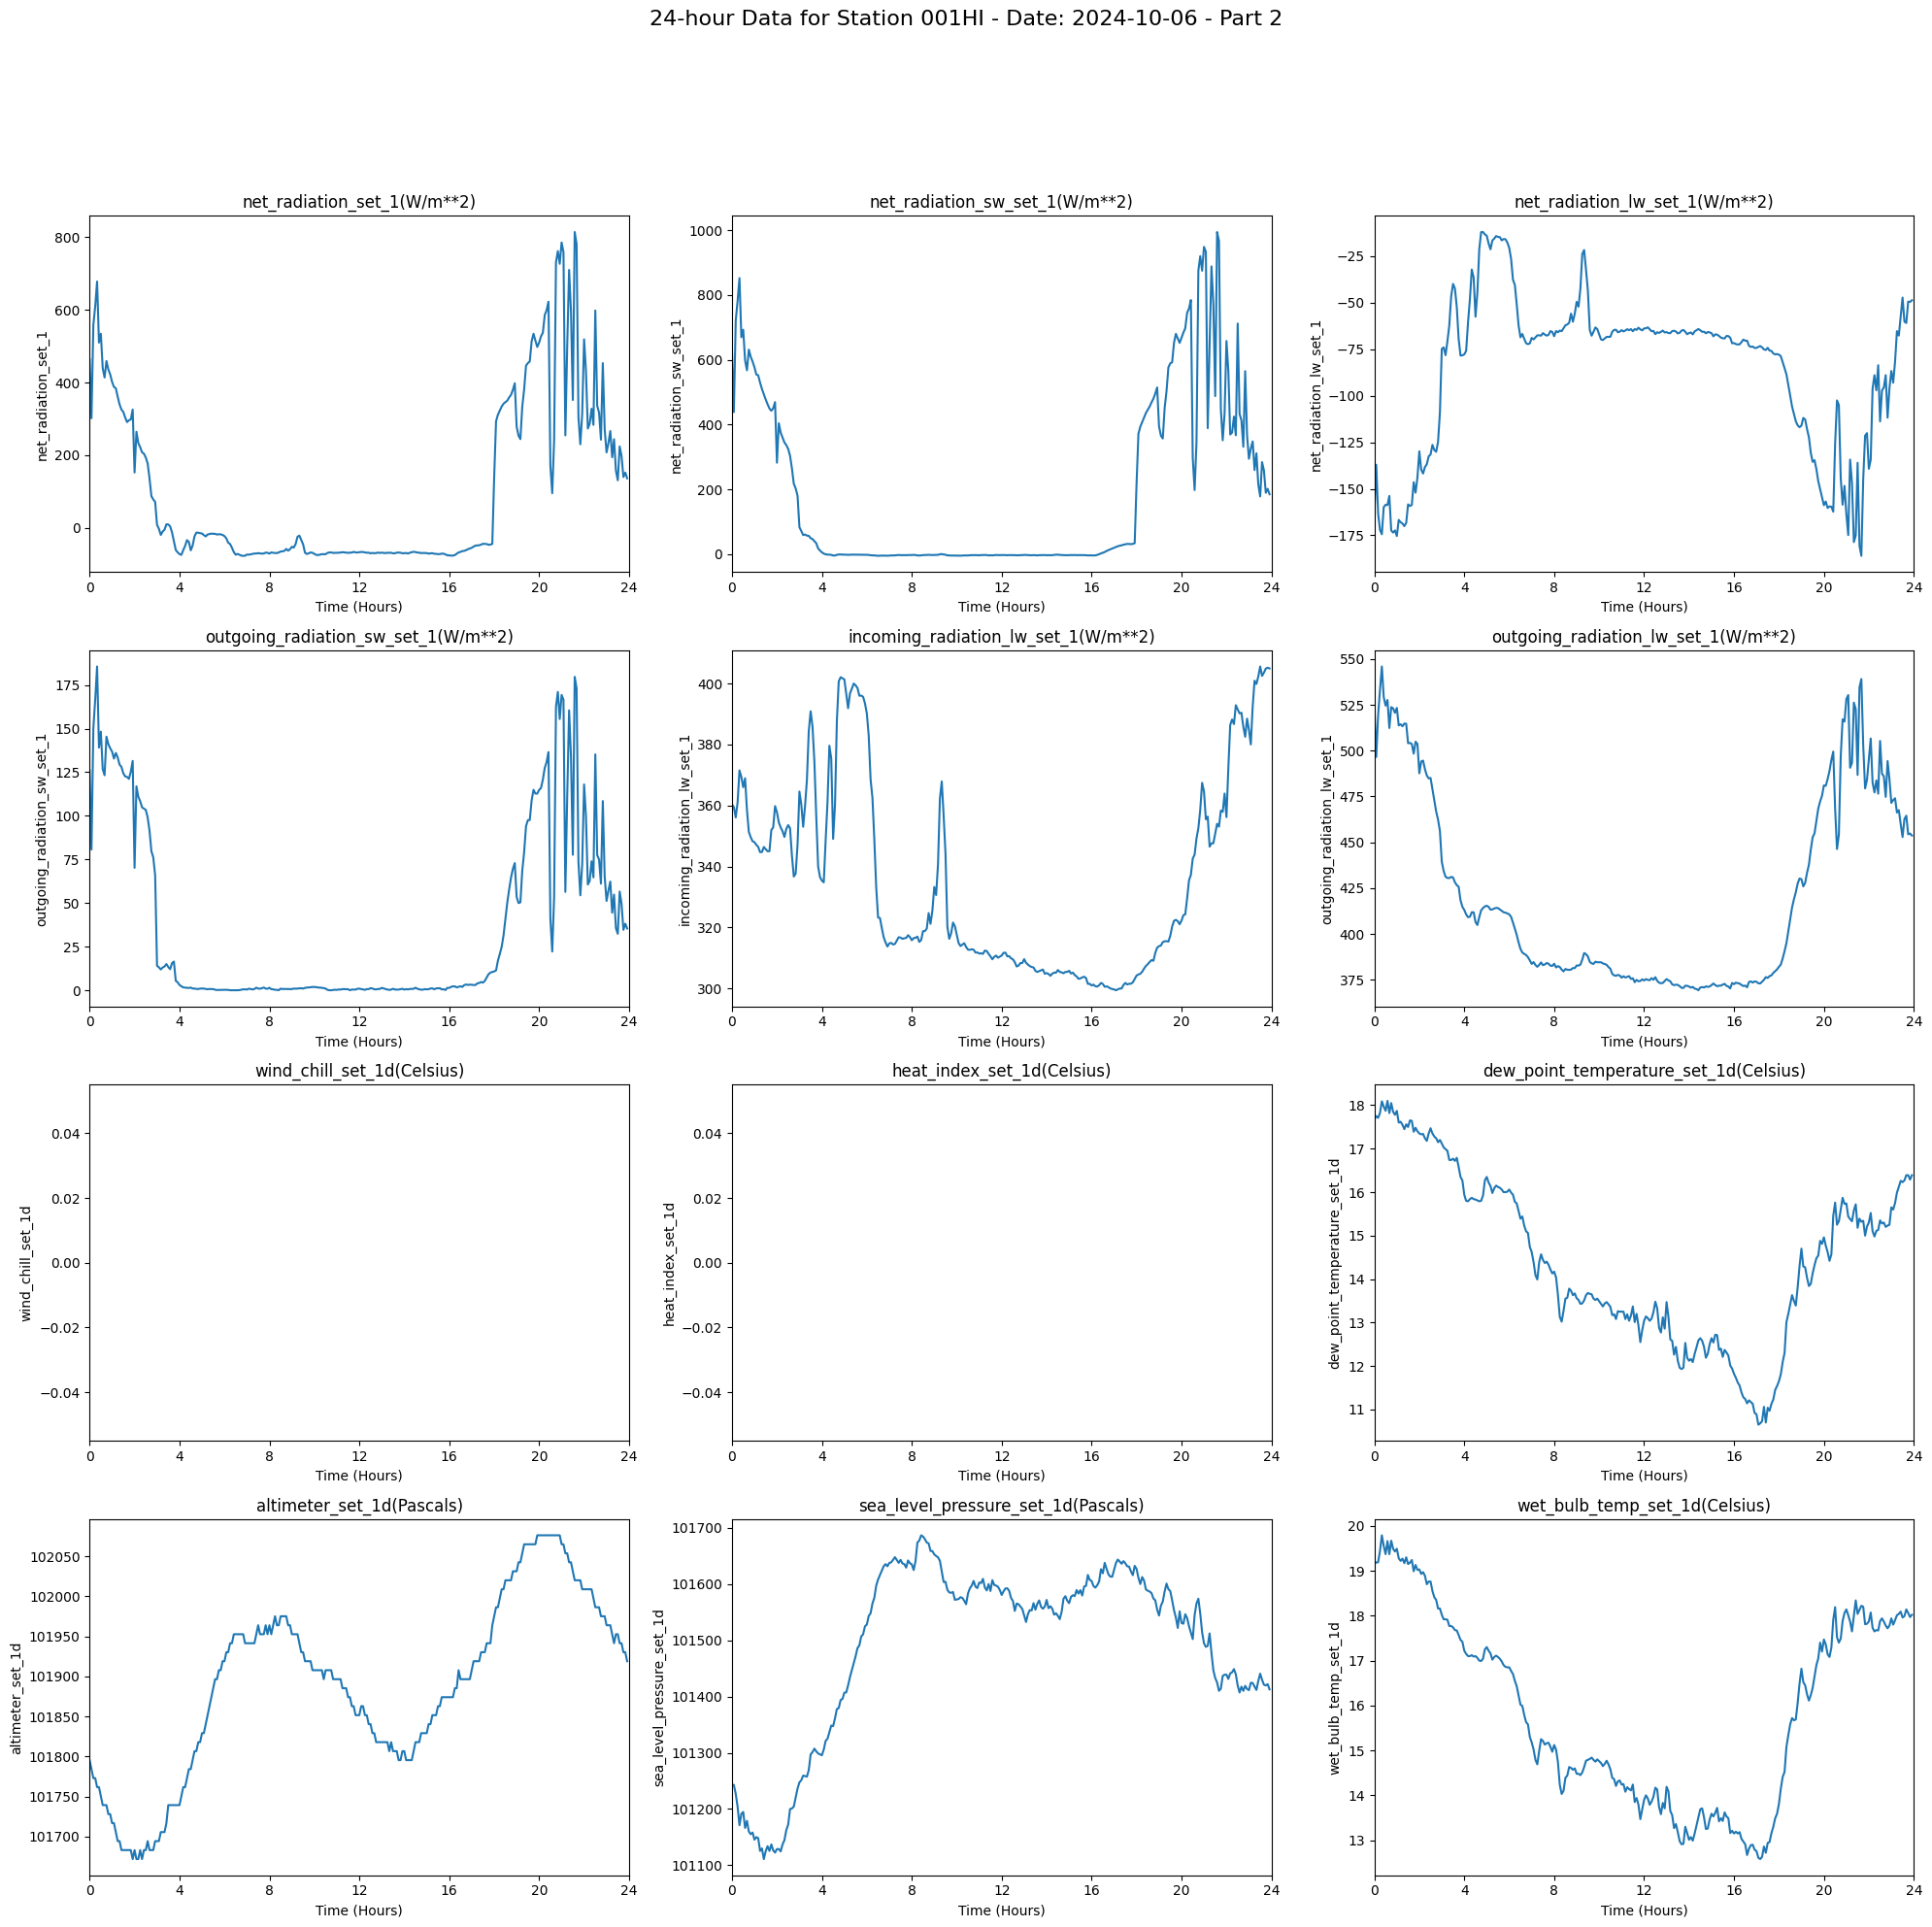

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def get_latest_csv_file(station_id='001HI'):
    # Use the correct path to your CSV files
    raw_data_dir = r'c:\Users\as0780\OneDrive - Lennox International, Inc\Desktop\Personal\Coimbra Group\Longwave-Radiation-Model-Hawaii\Raw Station Datasets'
    csv_files = [f for f in os.listdir(raw_data_dir) if f.startswith(station_id) and f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found for station {station_id}")
    return os.path.join(raw_data_dir, max(csv_files))

def load_station_data(file_path):
    # Extract metadata
    with open(file_path, 'r') as f:
        meta_lines = [f.readline().strip() for _ in range(12)]

    # Combine the Parameter + its Units (lines 11 and 12)
    headers = meta_lines[10].split(',')
    units = meta_lines[11].split(',')

    new_headers = []
    for header, unit in zip(headers, units):
        if unit.strip():
            new_headers.append(f'{header.strip()}({unit.strip()})')
        else:
            new_headers.append(header.strip())

    # Load data
    df = pd.read_csv(file_path, skiprows=12, names=new_headers)
    
    # Identify the date/time column
    date_col = df.columns[1]  # Assuming the second column is the date/time column
    df[date_col] = pd.to_datetime(df[date_col], format='ISO8601')
    return df, date_col

def get_24_hour_data(df, date_col):
    latest_date = df[date_col].max()
    start_date = latest_date.replace(hour=0, minute=0, second=0, microsecond=0) - timedelta(days=1)
    end_date = start_date + timedelta(days=1)
    return df[(df[date_col] >= start_date) & (df[date_col] < end_date)]

def plot_half_variables(df, date_col, station_id, half):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'Station_ID']
    mid_point = len(numeric_cols) // 2
    if half == 1:
        cols_to_plot = numeric_cols[:mid_point]
    else:
        cols_to_plot = numeric_cols[mid_point:]

    n_cols = 3
    n_rows = (len(cols_to_plot) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    date_label = df[date_col].iloc[0].date()  # Get the date for title
    fig.suptitle(f'24-hour Data for Station {station_id} - Date: {date_label} - Part {half}', fontsize=16, y=1.02)

    # Get time in hours for X-axis
    time_labels = df[date_col].dt.hour + df[date_col].dt.minute / 60

    for i, col in enumerate(cols_to_plot):
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols]
        ax.plot(time_labels, df[col])
        ax.set_title(col)
        ax.set_xlabel('Time (Hours)')
        ax.set_ylabel(col.split('(')[0])
        ax.set_xlim(0, 24)
        ax.set_xticks(range(0, 25, 4))
        ax.tick_params(axis='x', rotation=0)

    # Remove any unused subplots
    if n_rows > 1:
        for i in range(len(cols_to_plot), n_rows * n_cols):
            fig.delaxes(axes[i // n_cols, i % n_cols])
    else:
        for i in range(len(cols_to_plot), n_cols):
            fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title clash
    plt.savefig(f'{station_id}_24hour_data_part{half}.png', dpi=300, bbox_inches='tight')
    print(f'Plot saved as {station_id}_24hour_data_part{half}.png')

def main():
    station_id = '001HI'
    try:
        file_path = get_latest_csv_file(station_id)
        df, date_col = load_station_data(file_path)
        df_24h = get_24_hour_data(df, date_col)
        plot_half_variables(df_24h, date_col, station_id, 1)  # First half
        plot_half_variables(df_24h, date_col, station_id, 2)  # Second half
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Plot saved as 001HI_24hour_data_part1.png
Plot saved as 001HI_24hour_data_part2.png


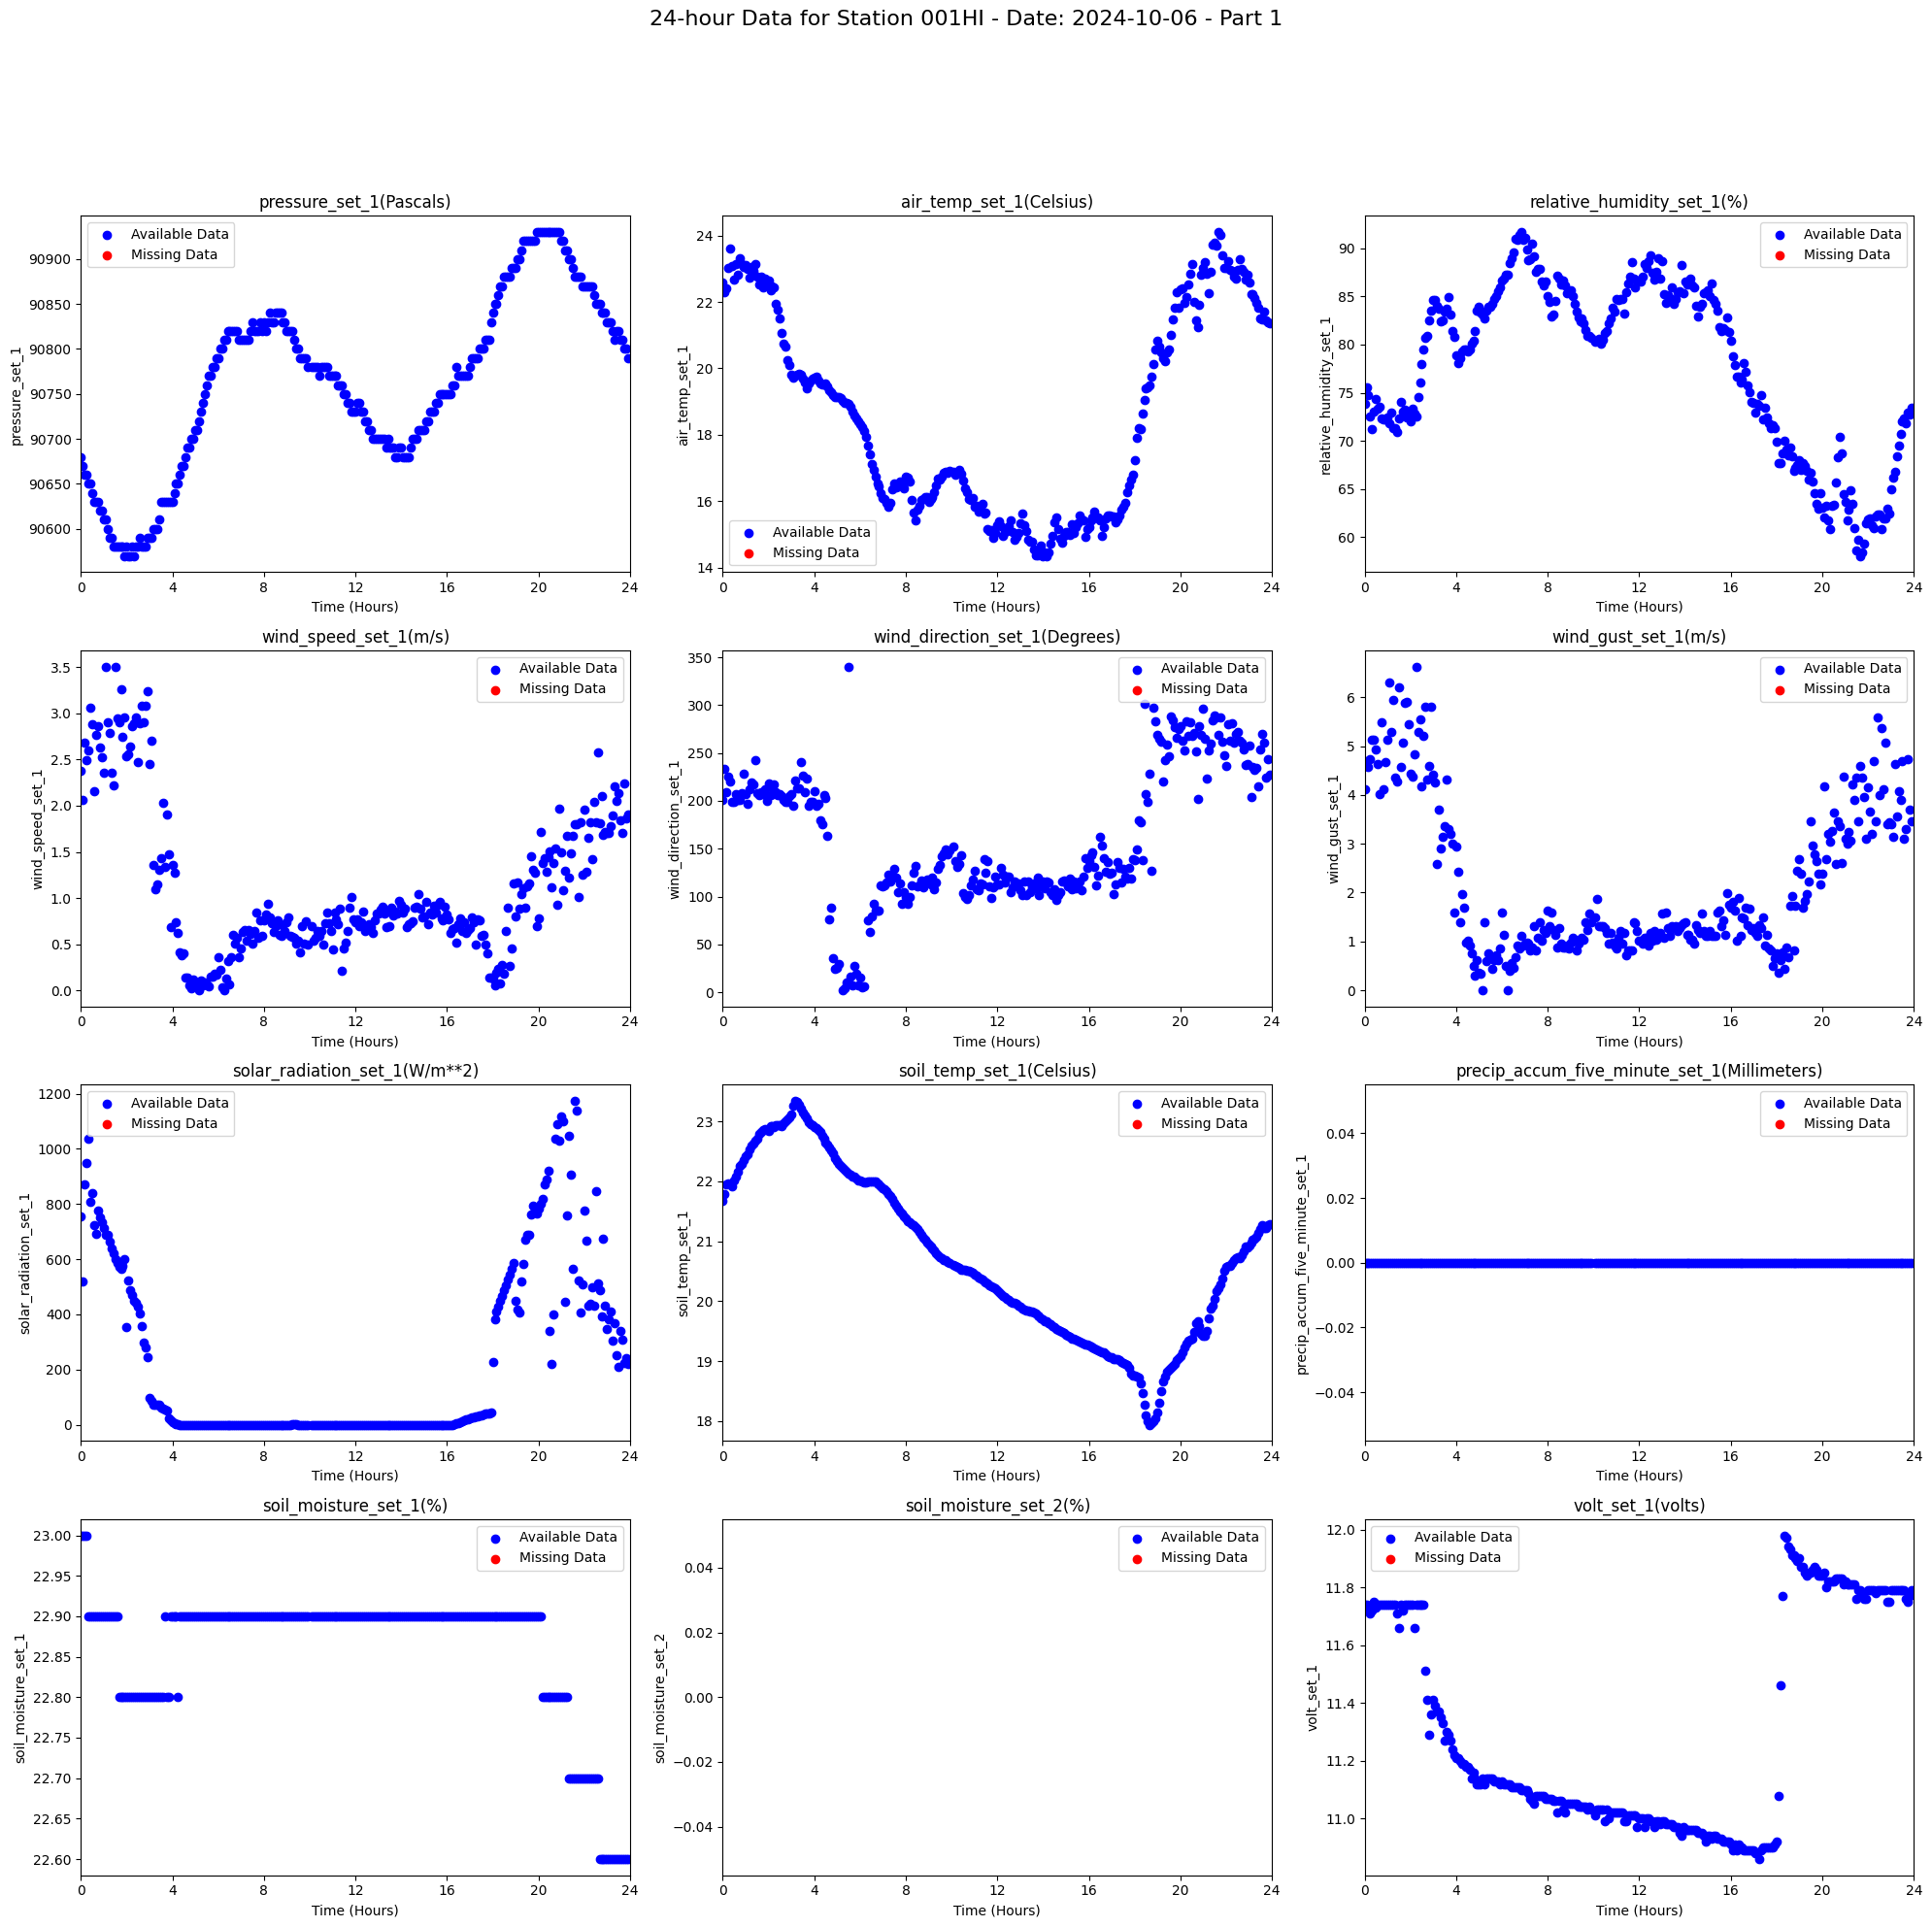

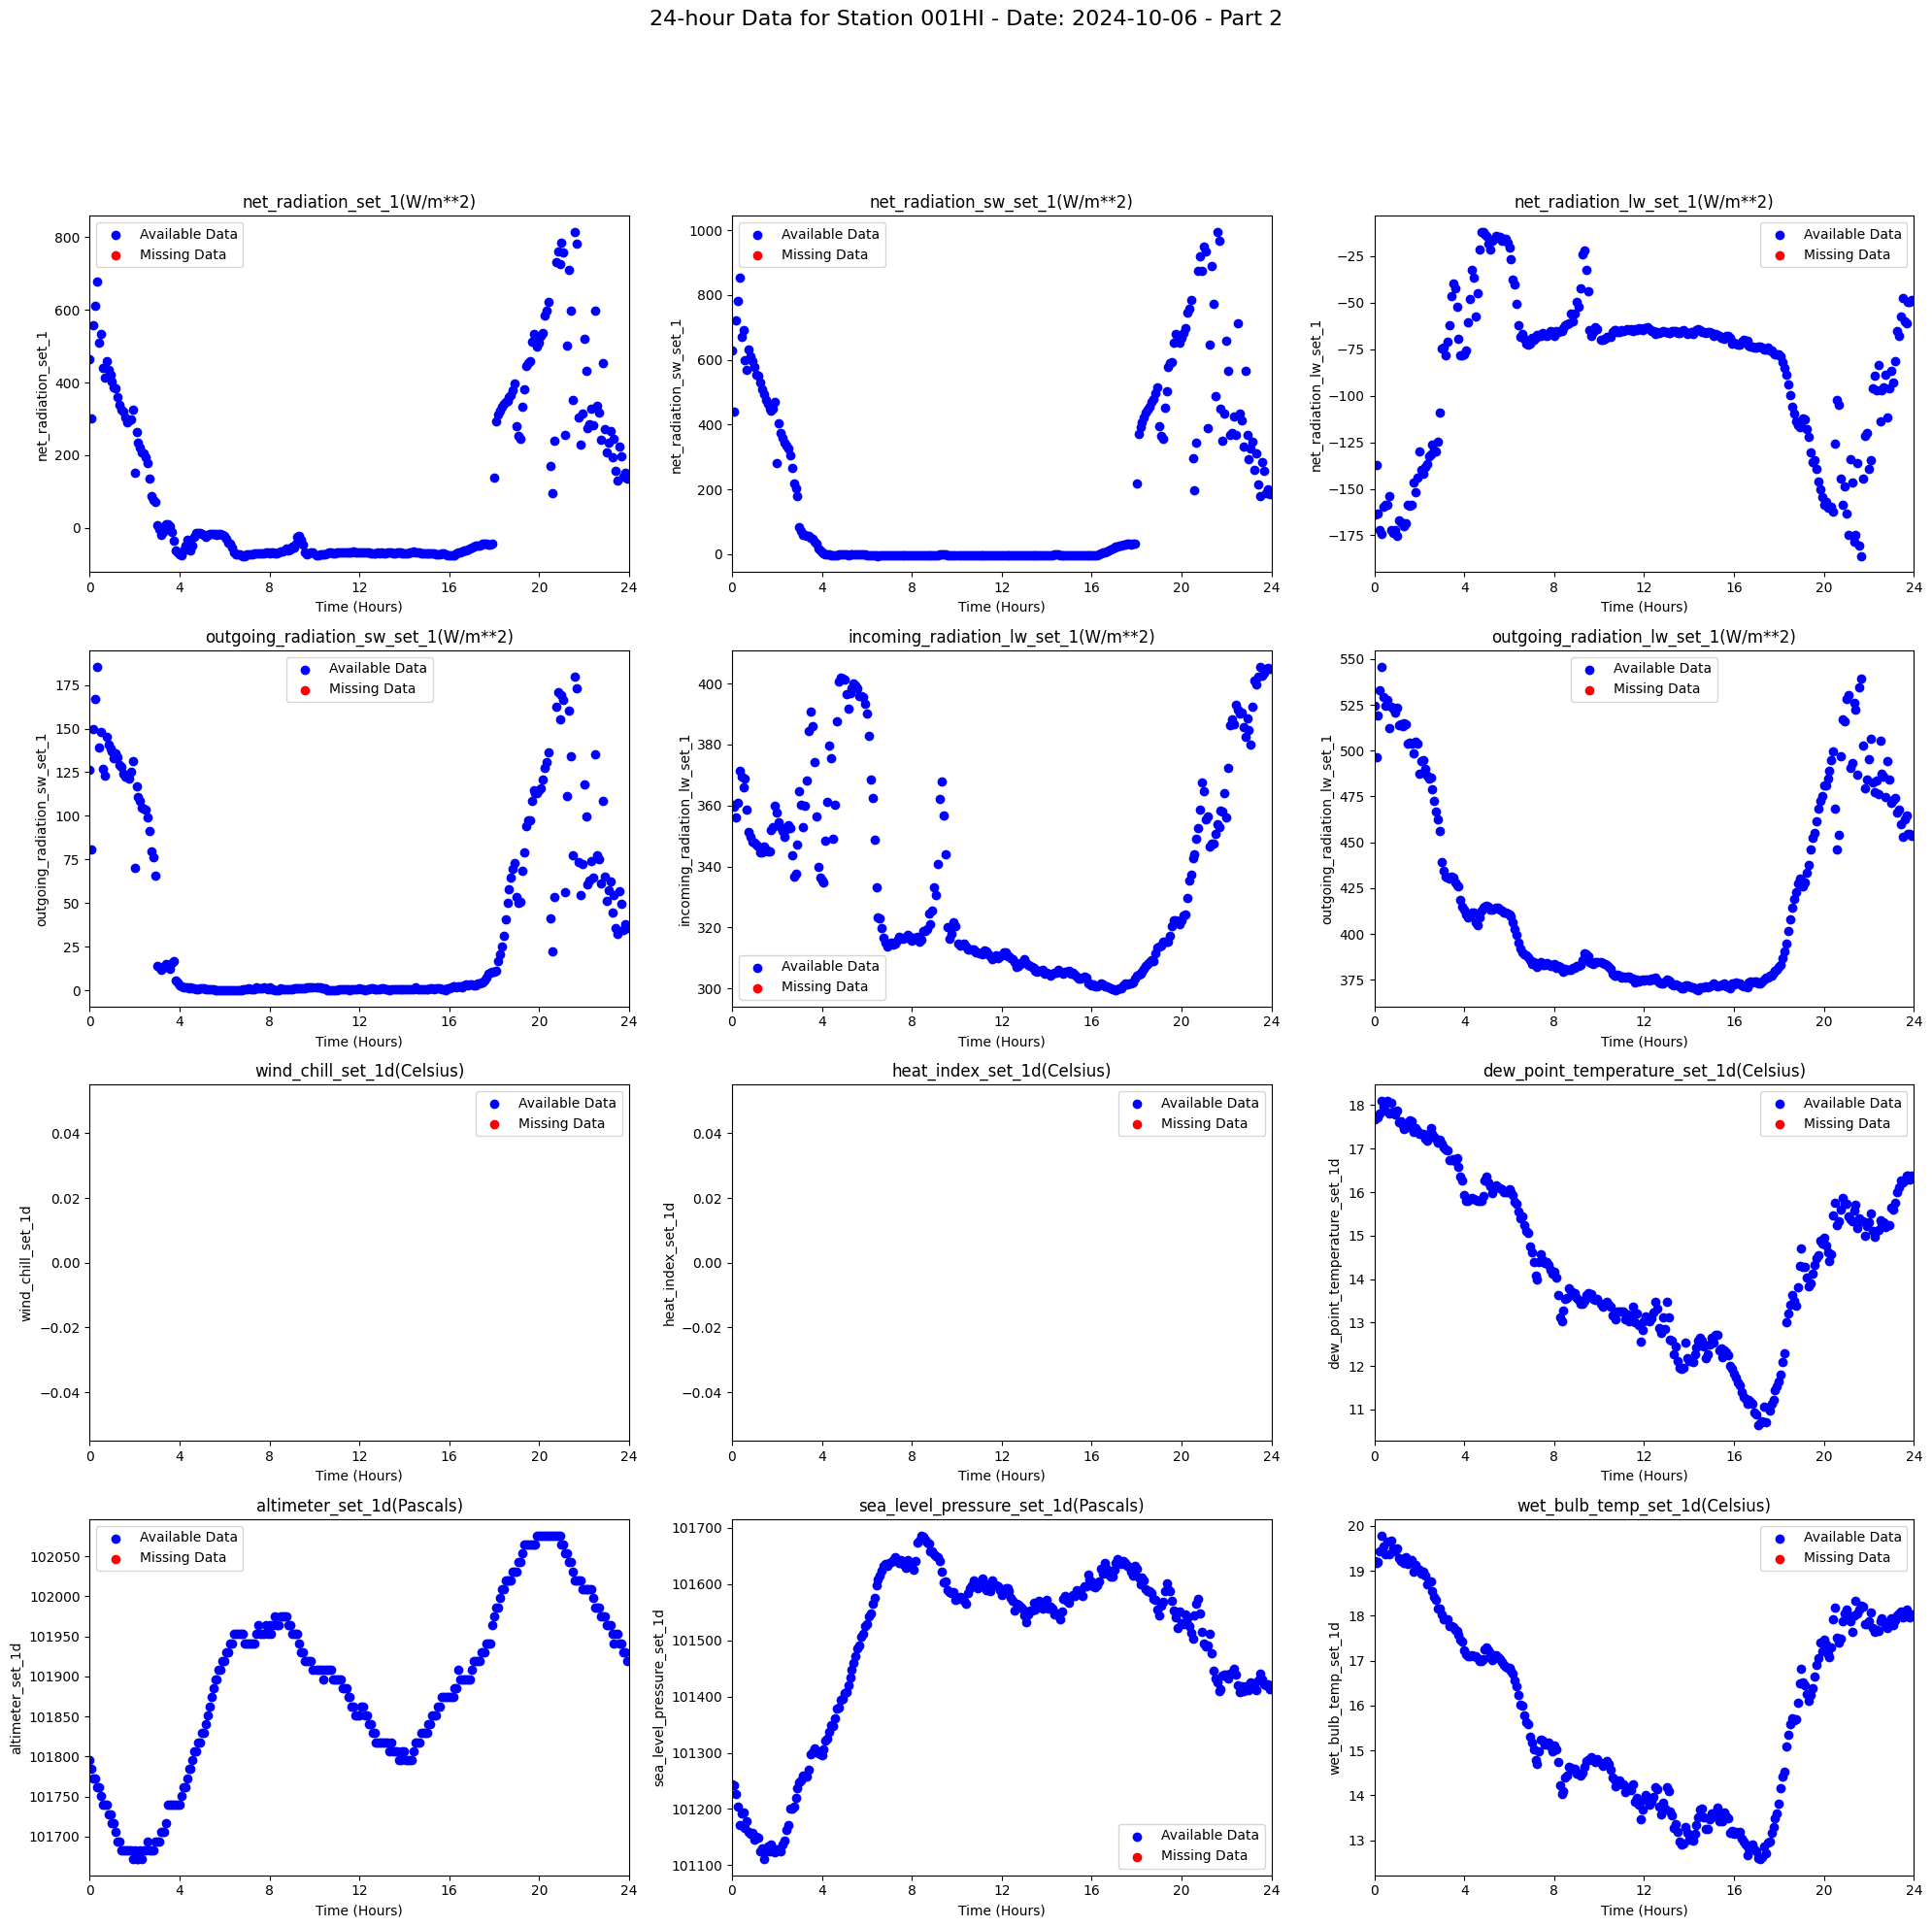

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def get_latest_csv_file(station_id='001HI'):
    raw_data_dir = r'c:\Users\as0780\OneDrive - Lennox International, Inc\Desktop\Personal\Coimbra Group\Longwave-Radiation-Model-Hawaii\Raw Station Datasets'
    csv_files = [f for f in os.listdir(raw_data_dir) if f.startswith(station_id) and f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found for station {station_id}")
    return os.path.join(raw_data_dir, max(csv_files))

def load_station_data(file_path):
    with open(file_path, 'r') as f:
        meta_lines = [f.readline().strip() for _ in range(12)]

    headers = meta_lines[10].split(',')
    units = meta_lines[11].split(',')

    new_headers = []
    for header, unit in zip(headers, units):
        if unit.strip():
            new_headers.append(f'{header.strip()}({unit.strip()})')
        else:
            new_headers.append(header.strip())

    df = pd.read_csv(file_path, skiprows=12, names=new_headers)
    
    date_col = df.columns[1]
    df[date_col] = pd.to_datetime(df[date_col], format='ISO8601')
    return df, date_col

def get_24_hour_data(df, date_col):
    latest_date = df[date_col].max()
    start_date = latest_date.replace(hour=0, minute=0, second=0, microsecond=0) - timedelta(days=1)
    end_date = start_date + timedelta(days=1)
    return df[(df[date_col] >= start_date) & (df[date_col] < end_date)]

def plot_half_variables(df, date_col, station_id, half):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'Station_ID']
    mid_point = len(numeric_cols) // 2
    if half == 1:
        cols_to_plot = numeric_cols[:mid_point]
    else:
        cols_to_plot = numeric_cols[mid_point:]

    n_cols = 3
    n_rows = (len(cols_to_plot) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    date_label = df[date_col].iloc[0].date()
    fig.suptitle(f'24-hour Data for Station {station_id} - Date: {date_label} - Part {half}', fontsize=16, y=1.02)

    time_labels = df[date_col].dt.hour + df[date_col].dt.minute / 60

    for i, col in enumerate(cols_to_plot):
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols]
        
        available_data = df[col].notnull()
        missing_data = ~available_data
        ax.scatter(time_labels[available_data], df[col][available_data], label='Available Data', color='blue')
        ax.scatter(time_labels[missing_data], df[col][missing_data], label='Missing Data', color='red')

        ax.set_title(col)
        ax.set_xlabel('Time (Hours)')
        ax.set_ylabel(col.split('(')[0])
        ax.set_xlim(0, 24)
        ax.set_xticks(range(0, 25, 4))
        ax.tick_params(axis='x', rotation=0)
        ax.legend()

    if n_rows > 1:
        for i in range(len(cols_to_plot), n_rows * n_cols):
            fig.delaxes(axes[i // n_cols, i % n_cols])
    else:
        for i in range(len(cols_to_plot), n_cols):
            fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'{station_id}_24hour_data_part{half}.png', dpi=300, bbox_inches='tight')
    print(f'Plot saved as {station_id}_24hour_data_part{half}.png')

def main():
    station_id = '001HI'
    try:
        file_path = get_latest_csv_file(station_id)
        df, date_col = load_station_data(file_path)
        df_24h = get_24_hour_data(df, date_col)
        plot_half_variables(df_24h, date_col, station_id, 1)
        plot_half_variables(df_24h, date_col, station_id, 2)
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()

Plot saved as 001HI_24hour_data_part1.png
Plot saved as 001HI_24hour_data_part2.png


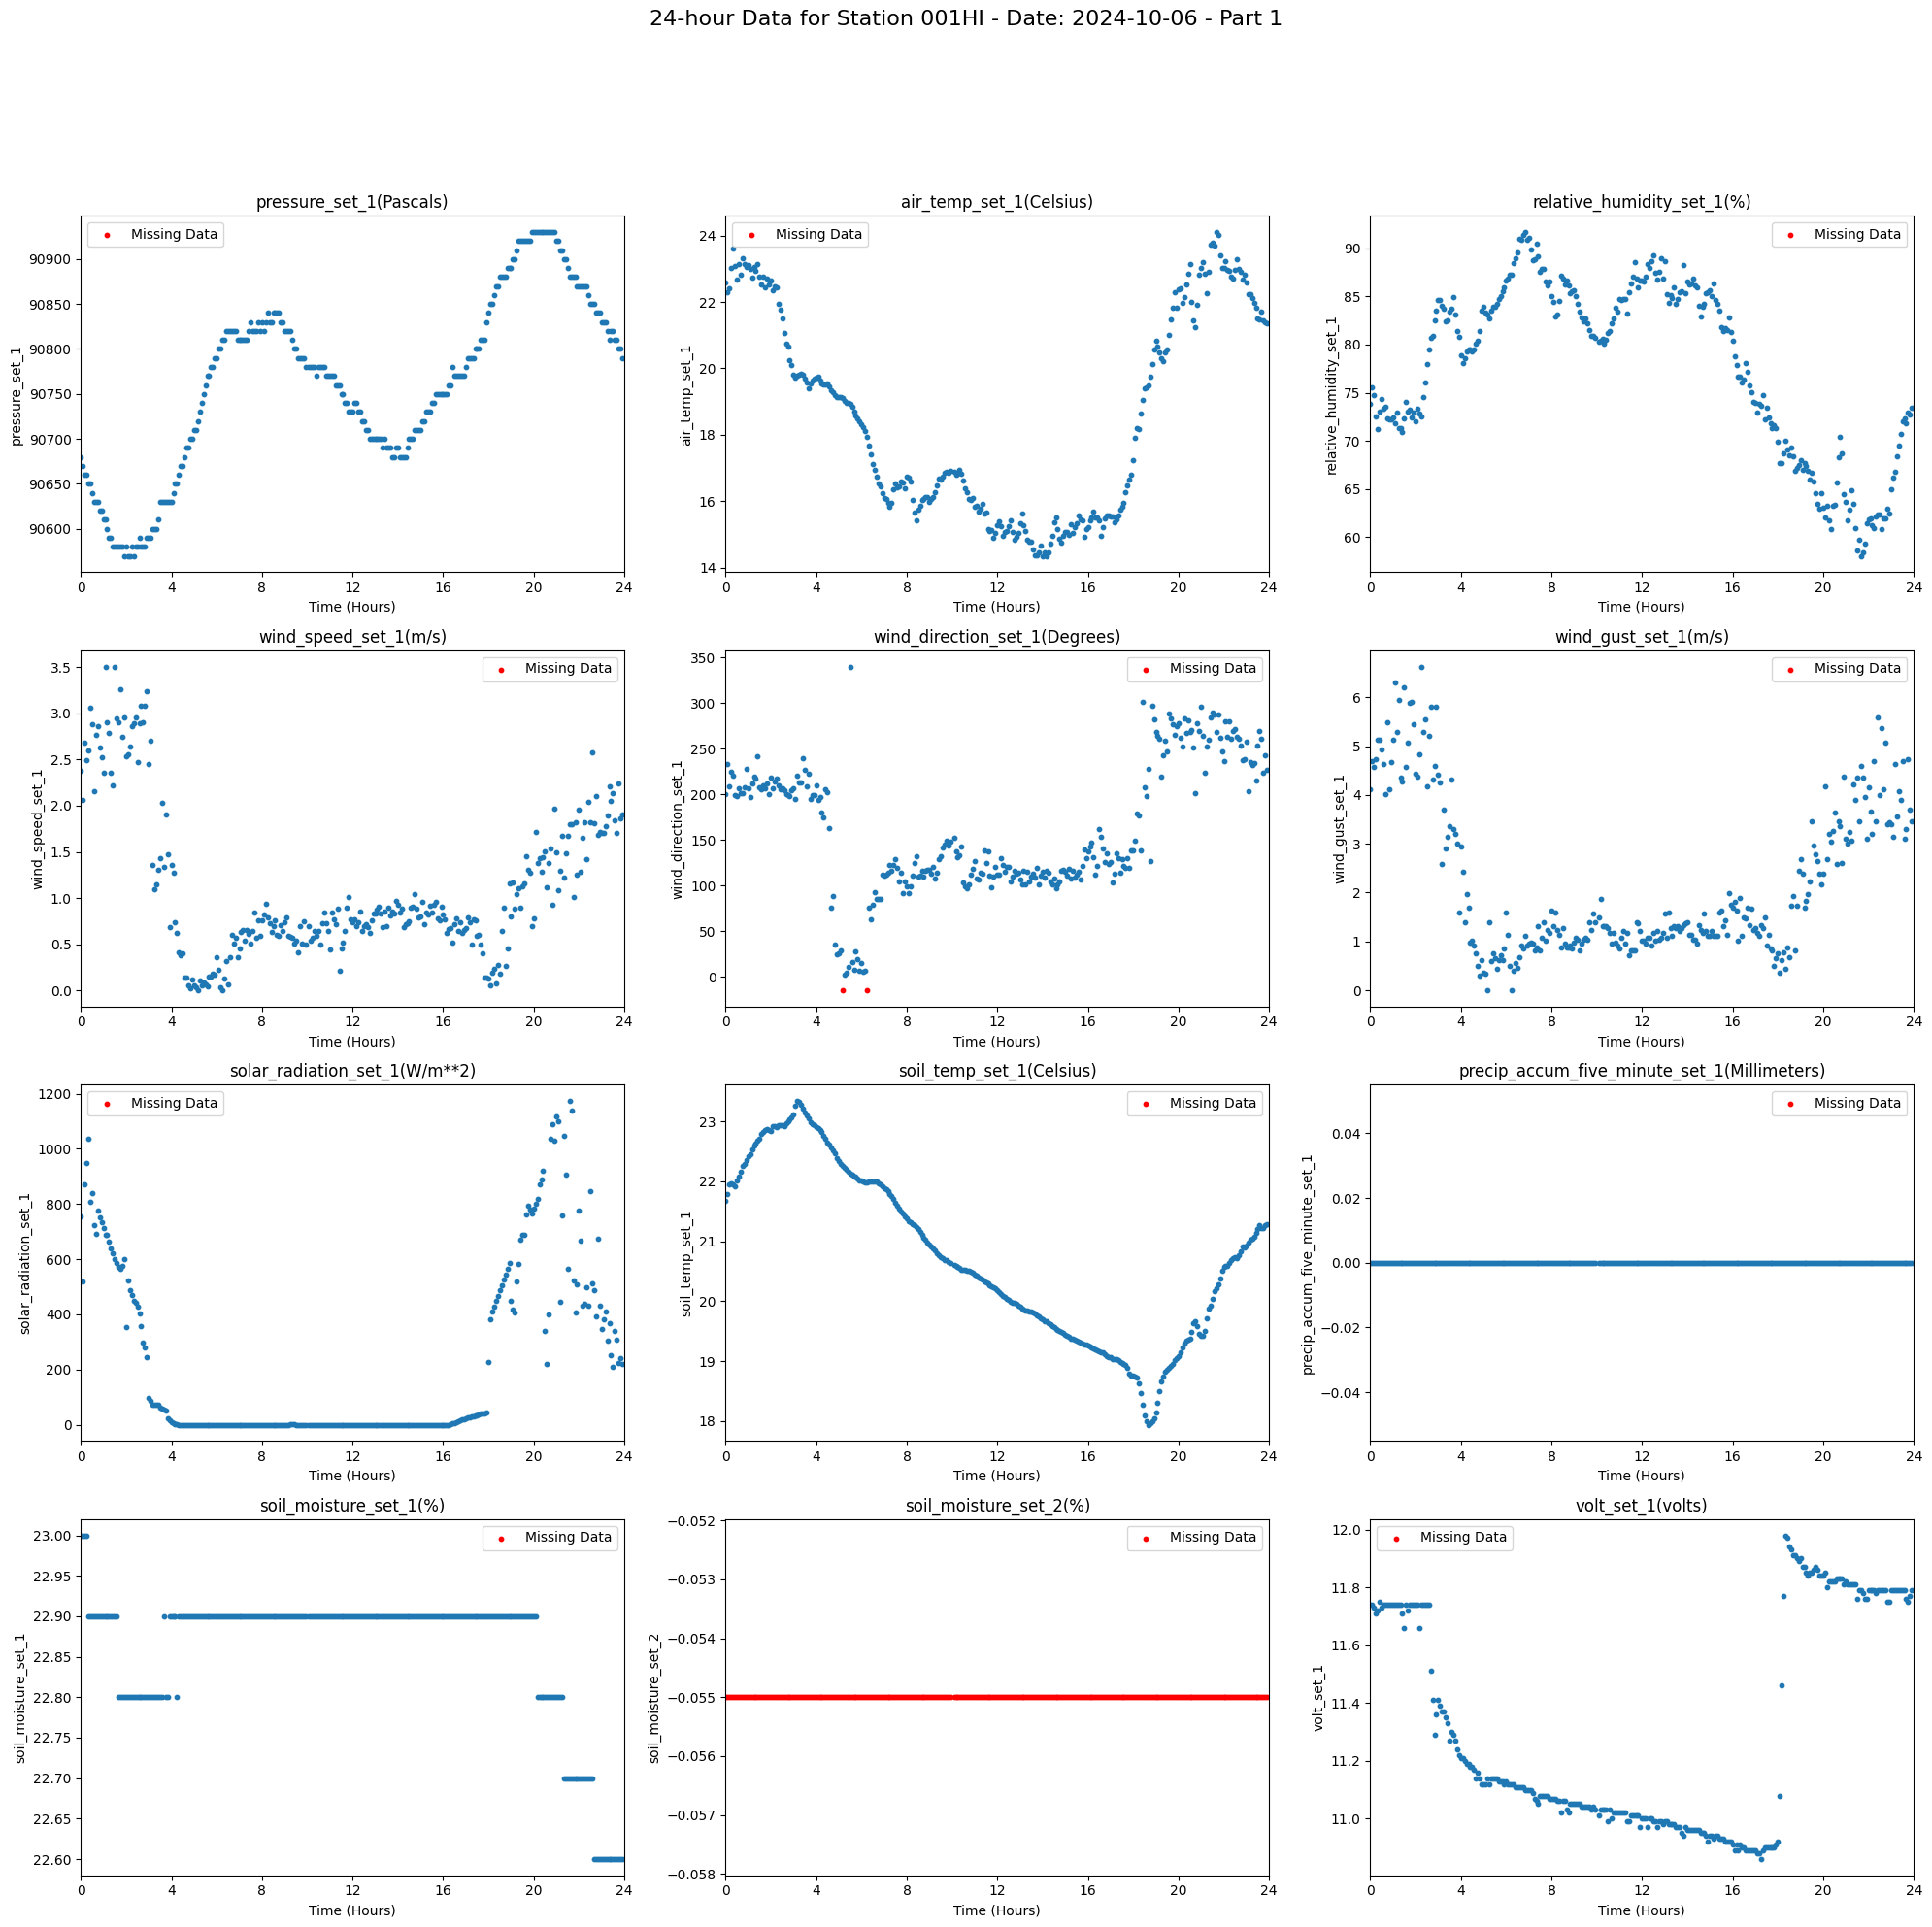

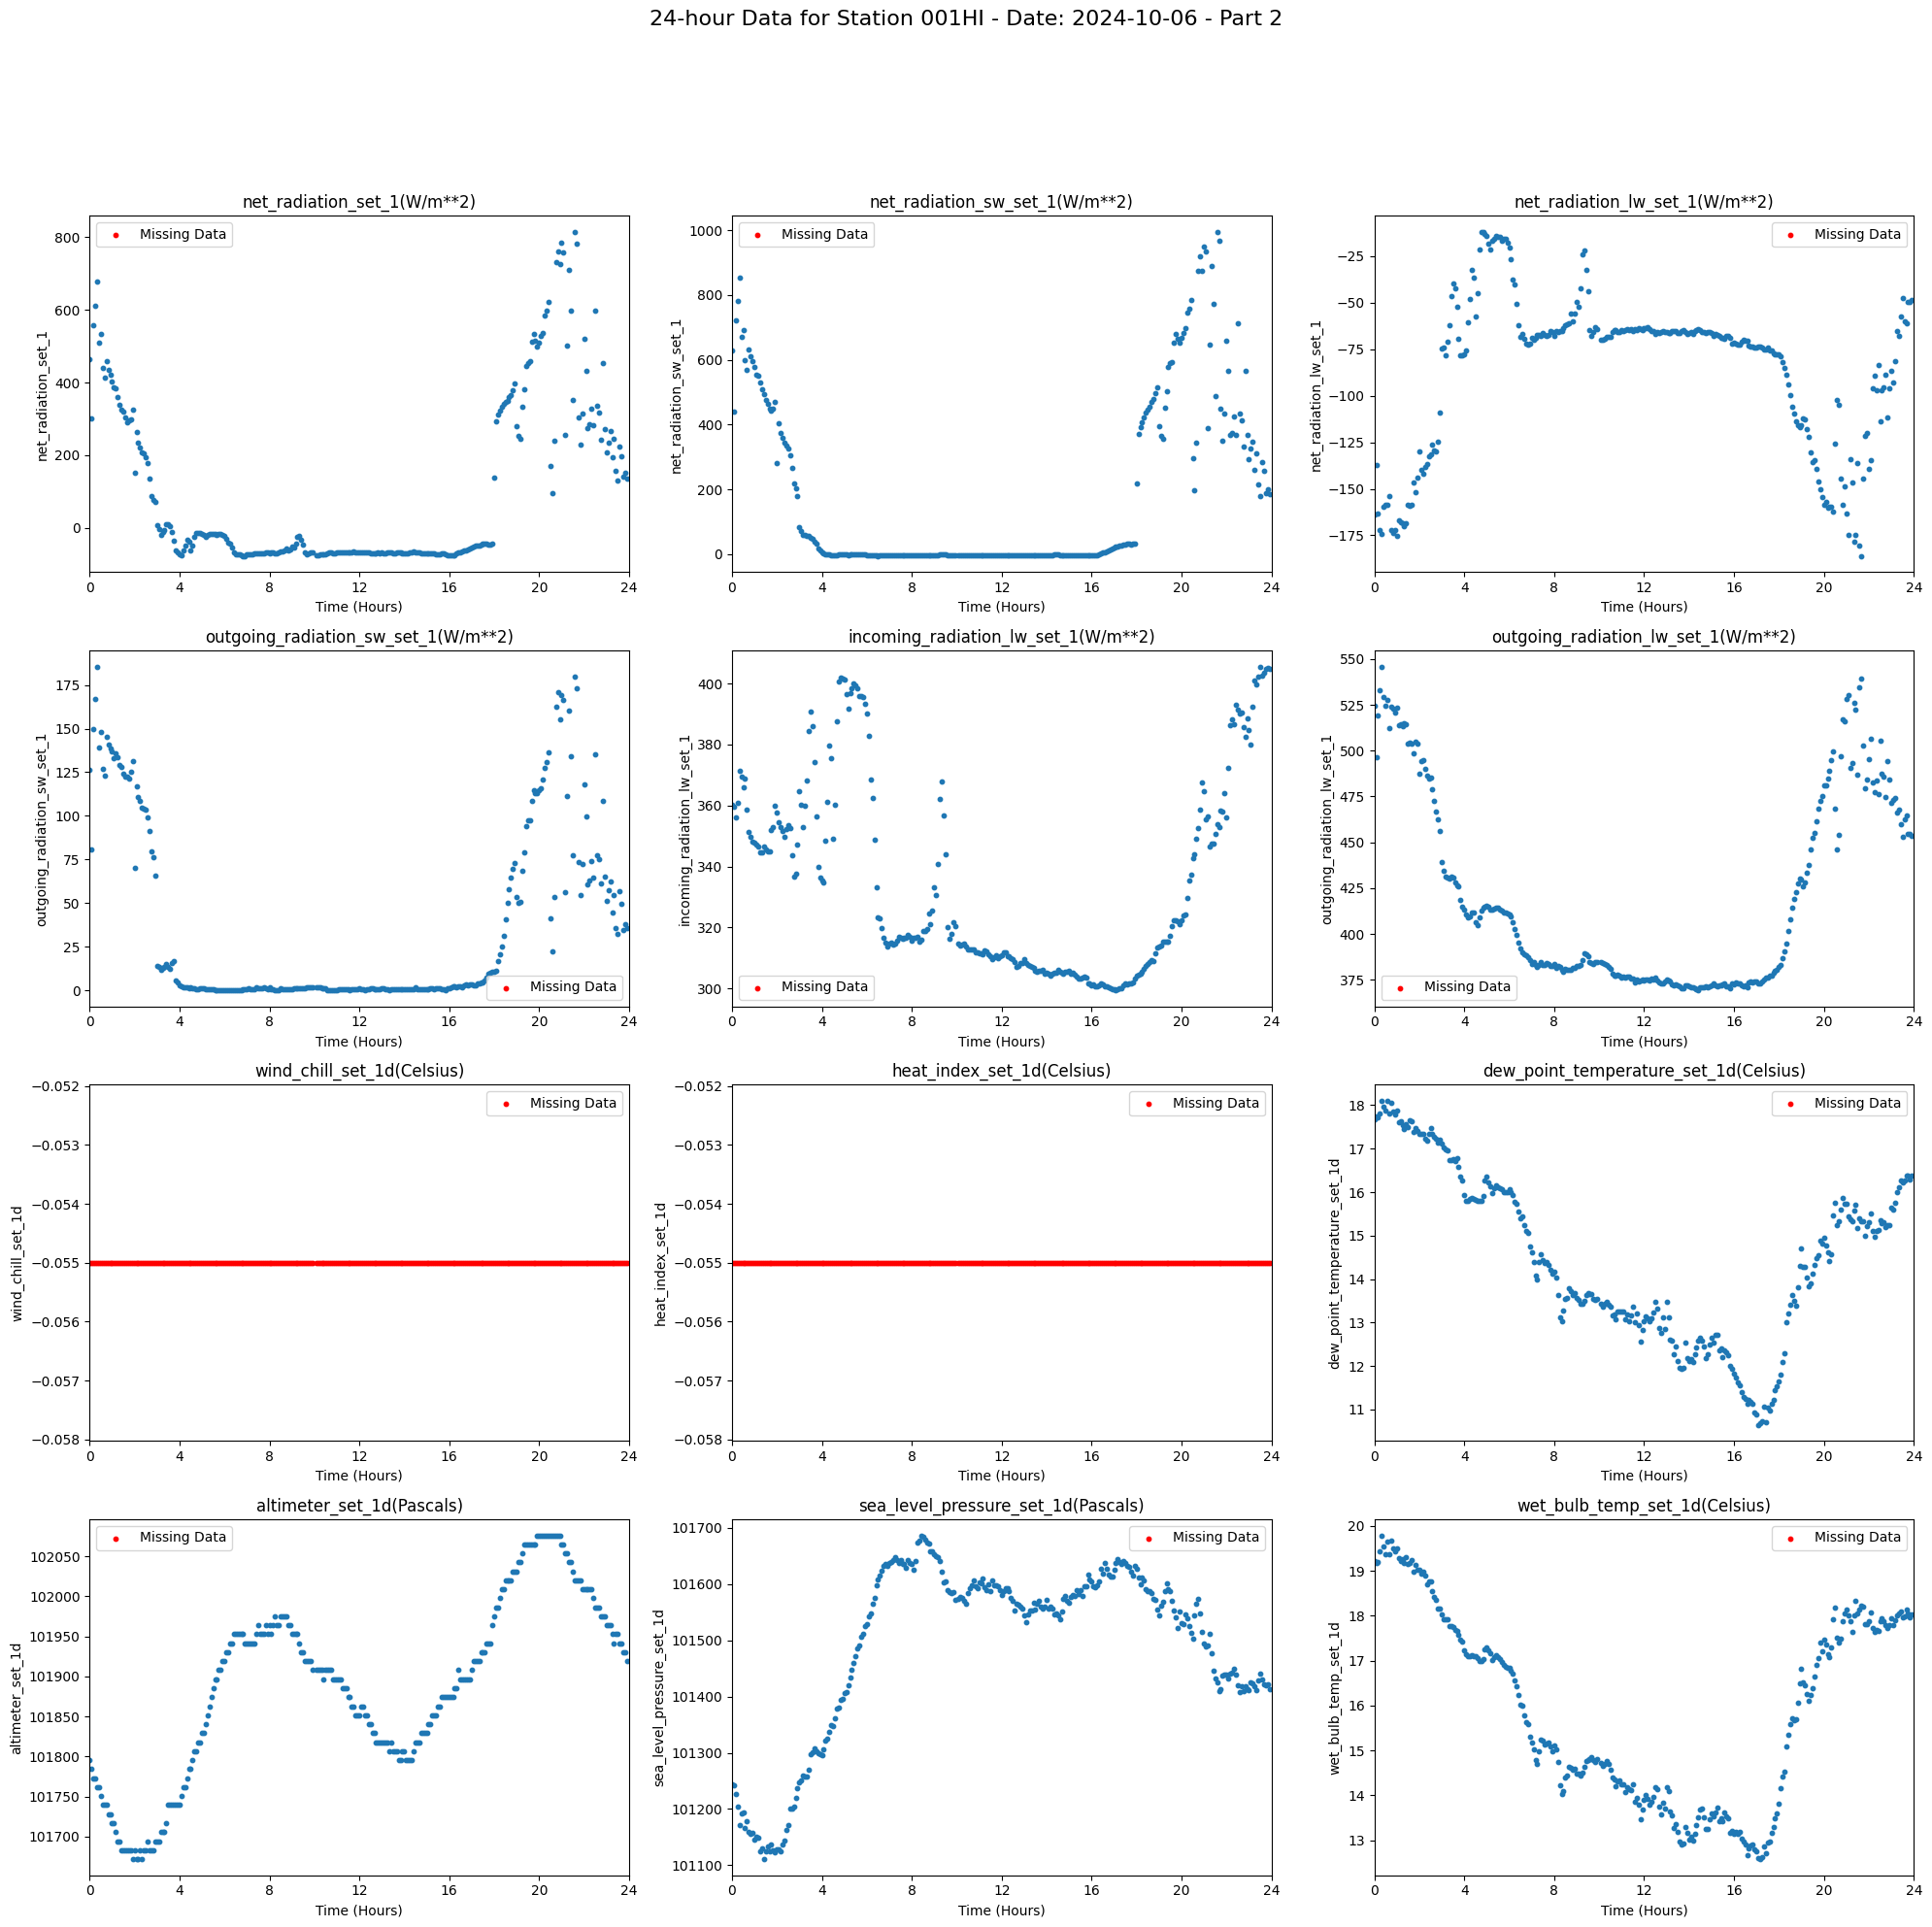

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

def get_latest_csv_file(station_id='001HI'):
    raw_data_dir = r'c:\Users\as0780\OneDrive - Lennox International, Inc\Desktop\Personal\Coimbra Group\Longwave-Radiation-Model-Hawaii\Raw Station Datasets'
    csv_files = [f for f in os.listdir(raw_data_dir) if f.startswith(station_id) and f.endswith('.csv')]
    if not csv_files:
        raise FileNotFoundError(f"No CSV files found for station {station_id}")
    return os.path.join(raw_data_dir, max(csv_files))

def load_station_data(file_path):
    with open(file_path, 'r') as f:
        meta_lines = [f.readline().strip() for _ in range(12)]

    headers = meta_lines[10].split(',')
    units = meta_lines[11].split(',')

    new_headers = []
    for header, unit in zip(headers, units):
        if unit.strip():
            new_headers.append(f'{header.strip()}({unit.strip()})')
        else:
            new_headers.append(header.strip())

    df = pd.read_csv(file_path, skiprows=12, names=new_headers)
    
    date_col = df.columns[1]
    df[date_col] = pd.to_datetime(df[date_col], format='ISO8601')
    return df, date_col

def get_24_hour_data(df, date_col):
    latest_date = df[date_col].max()
    start_date = latest_date.replace(hour=0, minute=0, second=0, microsecond=0) - timedelta(days=1)
    end_date = start_date + timedelta(days=1)
    return df[(df[date_col] >= start_date) & (df[date_col] < end_date)]

def plot_half_variables(df, date_col, station_id, half):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'Station_ID']
    mid_point = len(numeric_cols) // 2
    if half == 1:
        cols_to_plot = numeric_cols[:mid_point]
    else:
        cols_to_plot = numeric_cols[mid_point:]

    n_cols = 3
    n_rows = (len(cols_to_plot) - 1) // n_cols + 1

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    date_label = df[date_col].iloc[0].date()
    fig.suptitle(f'24-hour Data for Station {station_id} - Date: {date_label} - Part {half}', fontsize=16, y=1.02)

    time_labels = df[date_col].dt.hour + df[date_col].dt.minute / 60

    for i, col in enumerate(cols_to_plot):
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i % n_cols]
        
        # Plot available data with default color
        ax.scatter(time_labels, df[col], s=10)
        
        # Only indicate missing data with red
        missing_data = df[col].isnull()
        ax.scatter(time_labels[missing_data], [ax.get_ylim()[0]] * sum(missing_data), color='red', s=10, label='Missing Data')

        ax.set_title(col)
        ax.set_xlabel('Time (Hours)')
        ax.set_ylabel(col.split('(')[0])
        ax.set_xlim(0, 24)
        ax.set_xticks(range(0, 25, 4))
        ax.tick_params(axis='x', rotation=0)
        ax.legend()

    if n_rows > 1:
        for i in range(len(cols_to_plot), n_rows * n_cols):
            fig.delaxes(axes[i // n_cols, i % n_cols])
    else:
        for i in range(len(cols_to_plot), n_cols):
            fig.delaxes(axes[i])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'{station_id}_24hour_data_part{half}.png', dpi=300, bbox_inches='tight')
    print(f'Plot saved as {station_id}_24hour_data_part{half}.png')

def main():
    station_id = '001HI'
    try:
        file_path = get_latest_csv_file(station_id)
        df, date_col = load_station_data(file_path)
        df_24h = get_24_hour_data(df, date_col)
        plot_half_variables(df_24h, date_col, station_id, 1)
        plot_half_variables(df_24h, date_col, station_id, 2)
    except Exception as e:
        print(f"An error occurred: {e}")
        import traceback
        traceback.print_exc()

if __name__ == "__main__":
    main()